# Precision vs Accuracy
* Precision is the accuracy of basic arithmetic operations used in the computation
* Accuracy is the absolute or relative error of the approximate quantity
* NOTE: Accuracy is not limited by precision, finite precision arithmetic can simulate any precision with more computation

# Measuring Precision
## Significant Digits
The number of significant digits may be imprecise, prefer to use relative error.

In [ ]:
# Definition 1: Round down to p-sig. digit number
x  = 0.90
x1 = 0.99 # 2 correct significant digit, actual difference 0.09
x2 = 0.89 # 1 correct significant digit, actual difference 0.01

In [ ]:
# Definition 2: Round to nearest p-sig. digit number
y  = 0.9951 # --> 0.10
y1 = 0.9499 # --> 0.90 , only 1 correct sig. digit
y2 = 1.0000 # --> 0.10 , 3 correct sig. digits

The last definition avoids issues that the previous two had, but it's still non-ideal

In [ ]:
# Definition 3: Numbers x and x' match to p-sig. digits if x - x' < half a unit in p-th sig. digit of x
x1 = 0.123
x2 = 0.127
# 0.004 < (0.01 / 2) => x1 and x2 match in 2 significant digits according to this definition wchich may be slightly confusing 

## Absolute and relative error

In [ ]:
def absolute_error(true_value, approx_value):
    return abs(true_value - approx_value)

print 'Absolute error: {0:.9f}'.format(absolute_error(10.951, 10.949))

def relative_error(true_value, approx_value):
    return absolute_error(true_value, approx_value) / abs(true_value)

print 'Relative error: {0:.9f}'.format(relative_error(10.951, 10.949))

### Relative Error for Non-Scalars
For non-scalars, calculating normalized value *||x|| = max / sum*, implies smaller components of **x** are bound by absolute error only. Consider compensative relative error: *max(i) |xi - xi’| / |xi|*, which puts all components on equal footing.

In [ ]:
import numpy as np

def relative_error(true_value, approx_value):
    return np.max(np.fabs((true_value - approx_value) / true_value))

x_value = np.array([10000, 0.01])
x_approx = np.array([9999, 0.02])
                   
print relative_error(x_value, x_approx)

# Measuring Accuracy
## Backward and Forward Errors
* Forward error - error of the computed value
* Backward error:
  * Let y = f(x), given x we approximate f(x) with y’
  * Let dx be the smallest quantity where y’ = f(x + dx) in exact computation
  * Then dx is the backward error
* Benefits of using backward error:
  * Unifies error w/ perturbation in the data
  * Removes the need to calculate forward error
* Forward-backward error:
  * f(x + dx) = y + dy
  * Used to define stability of computation where just using backward error isn’t possible, e.g. sin, cos
* **If rounding errors are dominant source of errors, we call an algorithm numerically stable if it is stable in forward-backward error sense**
## Condition Number
* Condition number of a function with respect to its arguments is used to measure how how much the output of the function will change for a small change in the input
* As a rule of thumb, if the condition number kappa(A) = 10^k, then you may lose up to k digits of accuracy on top of what would be lost to the numerical method due to loss of precision from arithmetic methods
* A problem with a low condition number is said to be well-conditioned, while a problem with a high condition number is said to be ill-conditioned
* For example, the condition number associated with the linear equation Ax = b gives a bound on how inaccurate the solution x will be after approximation. Note that this is before the effects of round-off error are taken into account; conditioning is a property of the matrix, not the algorithm or floating point accuracy of the computer used to solve the corresponding system.

An important example of an **ill-conditioned problem is finding roots of a polynomial**. Let's look at Wilkinson’s polynomial as an example.

In [ ]:
# Wilkinson's polynomial is defined as p(x) = (x - 1)(x - 2)...(x - 20)
import numpy as np
x = np.linspace(0, 20, 4000)
y = 1
for i in range(1, 20):
    y *= (x - i)
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylim([-4e11, 4e11])
plt.plot(x, y)

Quoting Wikipedia:
* *"If the coefficient of x19 is decreased from −210 by 2−23 to −210.0000001192, then the polynomial value w(20) decreases from 0 to −6.25×10^17, and the root at x = 20 grows to x ≈ 20.8. The roots at x = 18 and x = 19 collide into a double root at x ≈ 18.62 which turns into a pair of complex conjugate roots at x ≈ 19.5±1.9i as the perturbation increases further."*
* *"Wilkinson's polynomial is often used to illustrate the **undesirability of naively computing eigenvalues of a matrix by first calculating the coefficients of the matrix's characteristic polynomial** and then finding its roots, since using the coefficients as an intermediate step may introduce an extreme ill-conditioning even if the original problem was well conditioned"*

# Sources of Error
## Truncation error (discretization error)
Error coming from representing a function or continuous variable using finite number of evaluations - outside of scope of this notebook, mentioned for completeness only.
## Round-off error
* Difference between calculated approximation and exact value due to rounding
* Related to representation error, which is due to representing numbers with finite number of digits

In [ ]:
import numpy as np
x = np.float64(0.1)
y = np.float32(0.1)
print '32- vs 64-bit representation difference:', abs(x - y)

### Rounding Multiple Times Can Accumulate Error

In [ ]:
import numpy as np
# For explanation why we we use np.round rather than default Python 2.7.3 round function, see below
x = 9.945309 
print np.round(x, 2), np.round(np.round(x, 2), 1)
print np.round(x, 1)

#### (Optional) Differences between round and np.round

There are few differences between built-in Python 2.7 round function and numpy (a)round:

* The built in function rounds away from zero
* Numpy round rounds to even, which tends to skew the results less and is a commonly accepted rounding method
* From my (limited) exerience it looks numpy round is much better behaved in dealing with decimal-to-binary float rounding errors

Note that Python 3 has a different round function that behaves more similarly to numpy round.

In [ ]:
import numpy as np
for i in range(13):
    x = -3 + 0.5 * i
    print '\t{0:5.1f}\t{1:5.1f}\t{2:5.1f}'.format(x, round(x), np.round(x))

## Loss of significance
Error in floating point arithmetic when an operation increases relative error substantially more than absolute error

In [ ]:
x_value = 0.123123
y_value = 0.123000
# We want to learn the value of d = x - y:
d_value = x_value - y_value
print 'Actual d value:', 
# Assuming we're apprximating above calculation with a 4 decimal digits precision:
import numpy as np
d_approx = np.round(x_value, 4) - np.round(y_value, 4)
print 'Approx d value:', d_approx
print 'Absolute error: {0:.9f}'.format(abs(d_value - d_approx))
print 'Relative error: {0:.9f}'.format(abs((d_value - d_approx) / d_value))

### Cancellation
Cancellation is an example of loss of significance and it happens when two nearly equal numbers are subtracted and can lead to significant inaccuracies. As an example let's look at function:  
f(x) = (1 - cos x) / x^2  
We can see that calculating f(x) near zero may lead to issues, since cos(0) = 1.

In [ ]:
import numpy as np
from math import sin, cos
near_zero = 1.2e-8
def f(x):
    return (1 - np.cos(x)) / x**2
print 'Value of f near zero:', f(near_zero)
x = np.linspace(near_zero, 10, 100)
y = f(x)
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylim([0, 1])
plt.plot(x, y)

Fortunately, we can rewrite f(x) in a form that is less prone to cancellation:

In [ ]:
def g(x):
    return 0.5 * (2 * np.sin(x / 2) / x)**2
print 'Value of g near zero:', g(near_zero)
x = np.linspace(near_zero, 10, 100)
y = g(x)
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylim([0, 1])
plt.plot(x, y)

Summing numbers: https://docs.python.org/2/library/math.html https://en.m.wikipedia.org/wiki/Kahan_summation_algorithm
Interestingly, IPython Notebook appears to do the right thing by default, what?
IPython session:

In [6]: from math import fsum

In [7]: sum([0.1] * 10) Out[7]: 0.9999999999999999

In [8]: fsum([0.1] * 10) Out[8]: 1.0

In [ ]:
from math import fsum
print '{0:0.20f}'.format(sum([0.1] * 10))
print '{0:0.20f}'.format(fsum([0.1] * 10))

### Calculations without subtractions are fine, right?
Hint: No, we can still over/under-flow the floating point precision numbers.

In [ ]:
def naive_e(n):
    return (1 + 1.0 / n)**n

from math import exp
e = exp(1)

for i in range(5, 20):
    print naive_e(10**i) - e

In [ ]:
from math import sqrt
def identity(x, n):
    for i in xrange(n):
        x = sqrt(x)
    for i in xrange(n):
        x = x**2
    return x
x = 2
for i in xrange(35, 60):
    print x - identity(x, i)

### Sometimes the rounding errors cancel out and produce a result more accurate than the intermediate calculations

In [ ]:
# Computing f(x) = (exp(x) - 1) / x == sum(x^i / (i + 1)!)

from math import exp, log

def f1(x):
    if 0 == x:
        return 1
    return (exp(x) - 1) / x

def f2(x):
    if 0 == x:
        return 1
    y = exp(x)
    return (y - 1) / log(y)

# f(epsilon) ~= 1
for i in range(8, 15):
    epsilon = 1.0 / (10**i)
    print 'epsilon:', epsilon
    print '|1 - f1(epsilon)|:', abs(1 - f1(epsilon))
    print '|1 - f2(epsilon)|:', abs(1 - f2(epsilon))
    print
# NOTE: Above doesn't hold if we calculate for powers of 2!
# for i in range(30, 40):
#     print abs(1 - f1(1.0 / (2**i))), abs(1 - f2(1.0 / (2**i)))

## Rounding errors are not random

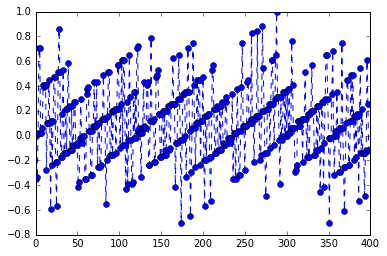

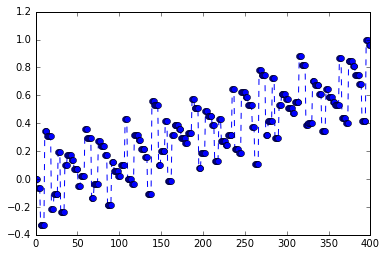

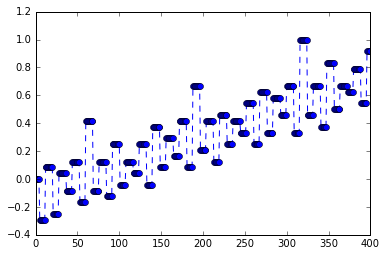

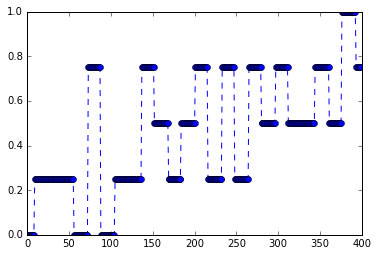

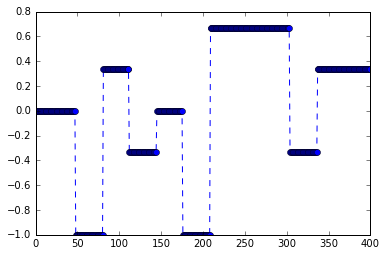

In [1]:
import numpy as np

def r(x):
    # Calculate value of a rational function using Horner's rule (https://en.wikipedia.org/wiki/Horner%27s_method)
    # More on the function can be looked up on Wolfram's Alpha:
    # http://www.wolframalpha.com/input/?i=f(x)+%3D+(622.0+-+x+*+(751.0+-+x+*+(324.0+-+x+*+(59.0+-+4+*+x))))+%2F+(112+-+x+*+(151+-+x+*+(72+-+x+*+(14+-+x))))&t=crmtb01
    p = 622.0 - x * (751.0 - x * (324.0 - x * (59.0 - 4 * x)))
    q = 112 - x * (151 - x * (72 - x * (14 - x)))
    return p / q

def calc_f(a):
    t = np.array([a + k * 2**-52 for k in xrange(400)])
    t = r(t)
    t -= t[0]
    t *= 1.0 / max(abs(t))
    return t

import matplotlib.pyplot as plt
%matplotlib inline

def plot(t):
    plt.plot(t, linestyle='--', marker='o')
    plt.show()
    
for a in [1.606, 4, 8, 16, 32]:
    plot(calc_f(a))

# Examples
## Variance Calculation
There are two concepts that we refer to as variance:

0. A property of a distribution
0. A characteristic of a set of observations

Variance of a random variable X is defined as:  
Var(X) = E[(X - E[X])^2] = ... = E[X^2] - (E[X])^2  
Where E[Z] is the expected value of a random variable Z.

**The second form (E[X^2] - (E[X])^2) should be avoided when performing calculations on a fixed precision machine.** Although it has a nice property that for sample variance it is easy to implement it while traversing the data just once, naive implementations usually suffer from extreme cancellation.

In [51]:
### Calculate the variance of X = sum of dice in N throws. The probabilities of each side of dice are given.
import numpy as np

# Dice sides probabilities, p[i] = probability of throwing i
# p = np.random.uniform(0, 1, 7)
p = np.ones(7, dtype=np.float64)
p[0] = 0
p /= sum(p)

# Number of throws
N = 10000

# Dynamic program, we're holding probability of throwing k-dice for each possibility.
# First iteration:
dp = np.ones(1)
for i in range(N):
    dp = np.convolve(dp, p)
print dp

# Let's calculate variance using both ways.

dice = np.arange(len(dp))

# var1 = E[(X - E[X])^2]
ex = (p * np.arange(7)).sum() * N
var1 = (dp * (dice - ex)**2).sum()
print var1

# var2 = E[X^2] - (E[X])^2
ex2 = (dice**2 * dp).sum()
var2 = ex2 - ex**2
print var2

[ 0.  0.  0. ...,  0.  0.  0.]
29166.6666666
29166.6659515


<h1>Designing stable algorithms</h1>

0. **Try to avoid subtracting quantities contaminated by error** (though such subtractions may be unavoidable)
0. **Minimize the size of intermediate quantities relative to the finalsolution**
    0. Otherwise the final answer may be the result of damaging subtractive cancellation
    0. See Gaussian elimination or recursive summation
0. **Look for different formulations of a computation that are mathematically but not numerically equivalent**
    0. The classical Gram-Schmidt method is unstable, but a trivial modification produces the stable modified Gram-Schmidt (MGS) method
    0. There are two ways of using the MGS method to solve a least squares problem, the more obvious of which is unstable.
0. **It is advantageous to express update formulae as:**  
***new_value = old_value + small_correction***  
**if the small correction can be computed with many correct significant figures**  
Numerical methods are often naturally expressed in this form, examples include
    0. Methods for solving ordinary differential equations, where the correction is proportional to a stepsize
    0. Newton's method for solving a nonlinear system
    0. A classic example of the use of this update strategy is in iterative refinement for improving the computed solution to a linear system:  
Ax = b  
    in which by computing residuals r = b - Ay in extended precision and solving update equations that have the residuals as right-hand sides a highly accurate solution can be computed
0. **Use only well-conditioned transformations of the problem**
     0. In matrix computations this amounts to multiplying by orthogonal matrices instead of nonorthogonal, and possibly, ill-conditioned matrices, where possible
0. **Take precautions to avoid unnecessary overflow and underflow**